<center>
<p>
<center>
Universidade Federal de Minas Gerais <br/>
Introdução à Programação de Computadores <br/>
2023/2
</center>
</p>
<h1><b>Projeto Prático Final</b></h1>
<b>Total: 10 pontos</b>
</center>

<br/>
<p>
<h4><b>Professores:</b></h4>
<ul>
    <li>Adriano César Machado Pereira</li>
    <li>George Luiz Medeiros Teodoro</li>
    <li>João Guilherme Maia de Menezes</li>
</ul>

In [ ]:
#@markdown ####**Aluno** {run: "auto"}
Nome = "Lucas Rocha Castro" #@param {type:"string"}
Matrícula = "2024009489" #@param {type:"string"}

------------------

# Introdução
---------------
Neste projeto realizaremos a manipulação de um grande arquivo de dados reais.
Trata-se de dados sobre economia mineral no Brasil gerados pela Agência Nacional de Mineração. Os dados utilizados estão disponíveis em [https://www.gov.br/anm](https://www.gov.br/anm/pt-br)

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.anm.gov.br/DadosAbertos/ARRECADACAO/CFEM_Arrecadacao.csv).
O CFEM é um imposto pago pelas empresas ou pessoas físicas a União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.




Tarefa 0 - Leitura dos dados
---------

**Essa está pronta! :-)**

Nas duas células abaixo baixamos e implementamos uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também criamos um dicionário <code>reg</code> pra facilitar o acesso aos registros.

**OBS1: Execute as duas células abaixo**

**OBS2: O arquivo é grande, então pode demorar para realizar o download (cerca de 10 minutos)**


In [1]:
import requests

URL = 'https://app.anm.gov.br/DadosAbertos/ARRECADACAO/CFEM_Arrecadacao.csv'
r = requests.get(URL, allow_redirects=True, verify=False)
file_name = URL.split('/')[-1]
with open(file_name, 'wb') as f:
    f.write(r.content)

c:\Users\Humberto\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'app.anm.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [2]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo.
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica.
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    with open(filename, 'r', encoding='ISO-8859-1') as file:

        # Criando uma lista vazia para armazenar todos os dados do arquivo
        dados = []

        # Para cada linha do arquivo, realizamos as seguintes operacoes:
        # (1) removemos o caractere '\n' do final da linha
        # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
        # (3) removemos as aspas extras
        # (4) transformamos a linha em uma lista
        # (5) adicionamos a lista de itens na lista 'dados'
        for line in file:
            dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
            dados[-1][-3] = dados[-1][-3].replace(',','.')
            dados[-1][-1] = dados[-1][-1].replace(',','.')

    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)

    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
rotulos, dados = le_dados("CFEM_Arrecadacao.csv")

print (rotulos, '\n')
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))
print()

# Criando dicionario pra facilitar acesso aos registros
index = 0
reg = {}
for d in rotulos:
  reg[d] = index
  index=index+1

print(reg)

['Ano', 'Mês', 'Processo', 'AnoDoProcesso', 'Tipo_PF_PJ', 'CPF_CNPJ', 'Substância', 'UF', 'Município', 'QuantidadeComercializada', 'UnidadeDeMedida', 'ValorRecolhido'] 

['2002', '8', '910262', '2007', 'PJ', '88503388000194', 'BASALTO', 'RS', 'TRÊS DE MAIO', '0', 'm3 ', '206.41']
Número total de registros: 2017750

{'Ano': 0, 'Mês': 1, 'Processo': 2, 'AnoDoProcesso': 3, 'Tipo_PF_PJ': 4, 'CPF_CNPJ': 5, 'Substância': 6, 'UF': 7, 'Município': 8, 'QuantidadeComercializada': 9, 'UnidadeDeMedida': 10, 'ValorRecolhido': 11}


Tarefa 1 - Evolução da arrecadação ao longo dos anos - (2 pontos)
---------

**Agora é com você!**

Implemente funções para gerar um gráfico com o valor recolhido do CFEM no Estado de Minas Gerais ao longo dos anos (2004 a 2023 em milhões de reais).



In [3]:
rotulos, dados = le_dados("CFEM_Arrecadacao.csv")

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def valores_anos():
    gastos = {}

    for dado in dados:
        ano = int(dado[0])
        uf = dado[7]
        mes = int(dado[1])

        if uf == 'MG':
            if ano >= 2004 and ano < 2023:
                gastos[ano] = gastos.get(ano, 0) + float(dado[11])/1000000
            elif ano == 2023 and mes < 11:
                gastos[ano] = gastos.get(ano, 0) + float(dado[11])/1000000
            
    return gastos

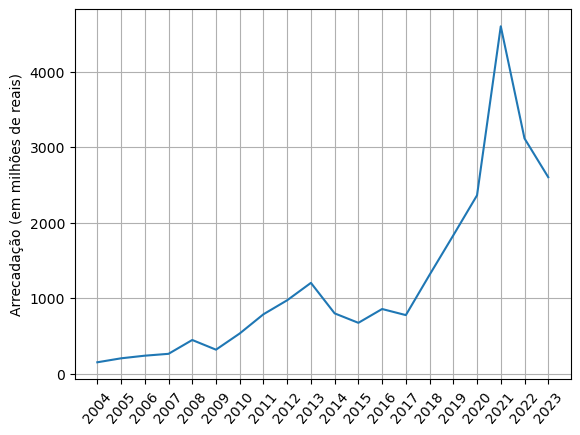

In [6]:
chama_gastos = valores_anos()

#Plotando o gráfico:
x = chama_gastos.keys()
y = chama_gastos.values()
plt.plot(x, y)

#Configurando o gráfico
plt.ylabel('Arrecadação (em milhões de reais)')
plt.xticks(np.arange(2004, 2024), rotation = 50)
plt.grid()


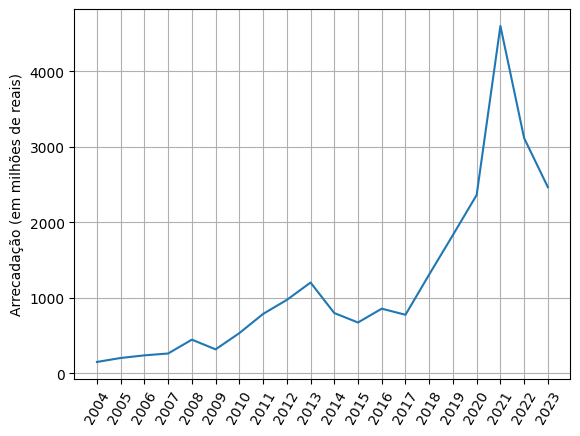

In [4]:
# NÃO EXECUTE ESTA CÉLULA PARA NÃO PERDER O GABARITO




Tarefa 2 - Extração de bauxita por estado entre 2015 e 2023 - (2 pontos)
---------

Implemente funções para plotar um gráfico de barras que mostra a extração de bauxita (**'BAUXITA'**) por estado brasileiro entre os anos de 2015 e 2023.

**Dica 1:** Bauxita é representada pela string 'BAUXITA' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

**Dica 3:** a unidade de medida de alguns registros está diferente de tonelada (t). Podem ignorar esse detalhe e assumir que a unidade de medida de todos os registros é tonelada.

In [7]:
from operator import itemgetter

In [8]:
def bauxita_estados():
    extração_bauxita = {}

    for dado in dados:
        ano = int(dado[0])
        uf = dado[7]
        substancia = dado[6]
        qtde_comercializada = dado[9]

        if qtde_comercializada != '':
            if substancia == 'BAUXITA':
                if ano >= 2015 and ano < 2024:
                    extração_bauxita[uf] = extração_bauxita.get(uf, 0) + float(qtde_comercializada)/1000000
                    extração_bauxita_organizado = sorted(extração_bauxita.items(), key=itemgetter(1), reverse=True)
    
    return extração_bauxita_organizado



In [9]:
chama_bauxita = bauxita_estados()

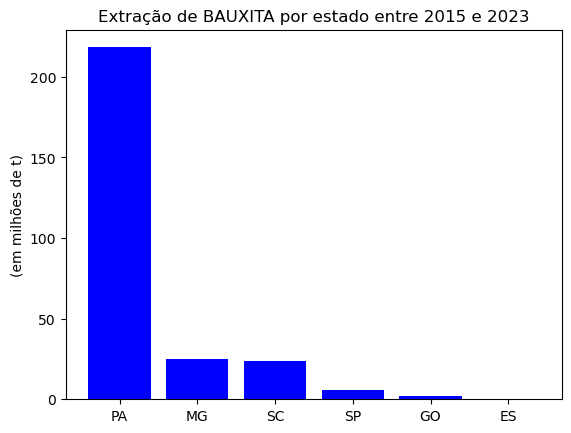

In [10]:
x = []
y = []

for i in range(len(chama_bauxita)):
    x.append(chama_bauxita[i][0])
    y.append(chama_bauxita[i][1])

#Plotando o gráfico
plt.bar(x, y, color='blue')

#Configurando o gráfico:
plt.title('Extração de BAUXITA por estado entre 2015 e 2023')
plt.ylabel('(em milhões de t)')

%matplotlib inline

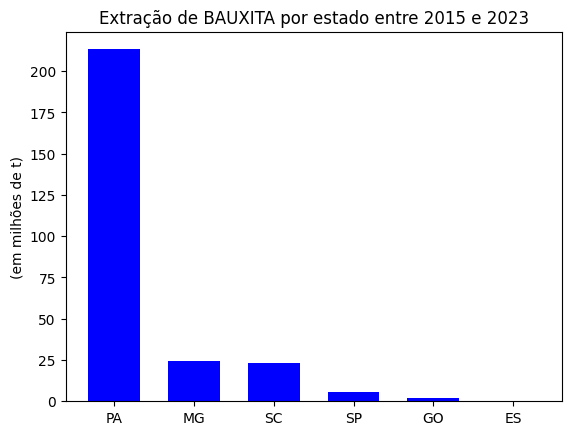

In [9]:
# NÃO EXECUTE ESTA CÉLULA PARA NÃO PERDER O GABARITO




Tarefa 3 - Extração de ouro por estado nos últimos dez anos - (2 pontos)
---------

Implemente funções para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2012 até 2022) na célula abaixo.
Sugestão: utilize funções implementadas nas tarefas anteriores.

**Dica 1:** Ouro é representado pela string 'OURO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

In [11]:
def ouro_estados():
    extração_ouro = {}

    for dado in dados:
        ano = dado[0]
        uf = dado[7]
        substancia = dado[6]
        qtde_comercializada = dado[9]

        if qtde_comercializada != '':
            if substancia == 'OURO' and uf != '':
                if ano >= '2012' and ano < '2023':
                    extração_ouro[uf] = extração_ouro.get(uf, 0) + float(qtde_comercializada)/1000000
                    extração_ouro_organizado = sorted(extração_ouro.items(), key=itemgetter(1), reverse=True)
    
    return extração_ouro_organizado


In [12]:
chama_ouro = ouro_estados()

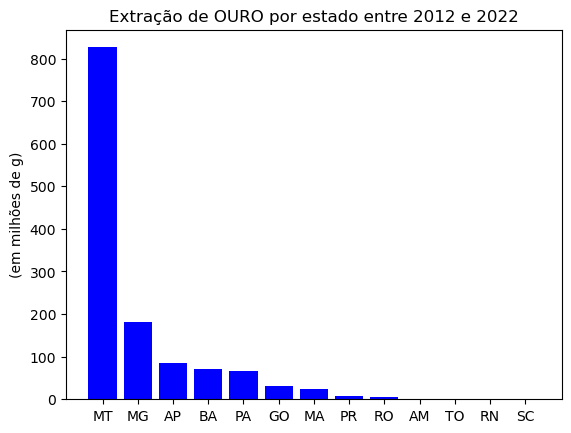

In [13]:
x = []
y = []

for i in range(len(chama_ouro)):
    x.append(chama_ouro[i][0])
    y.append(chama_ouro[i][1])

#Plotando o gráfico
plt.bar(x, y, color='blue')

#Configurando o gráfico:
plt.title('Extração de OURO por estado entre 2012 e 2022')
plt.ylabel('(em milhões de g)')

%matplotlib inline

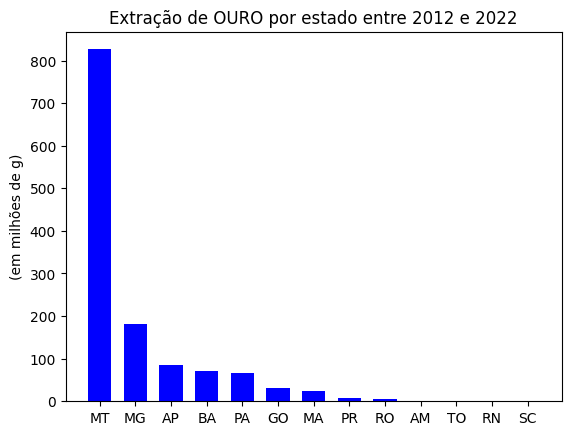

In [11]:
# NÃO EXECUTE ESTA CÉLULA PARA NÃO PERDER O GABARITO




Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará - (2 pontos)
---------

Implemente funções para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 2003 até 2023). Sugestão: copie e altere as funções implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

**Dica 1:** Ferro é representada pela string 'FERRO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

**Dica 3:** a unidade de medida de alguns registros está diferente de tonelada (t). Podem ignorar esse detalhe e assumir que a unidade de medida de todos os registros é tonelada.

In [14]:
def ferro_mg_pa():
    extração_mg = {}
    extração_pa = {}

    for dado in dados:

        mes = int(dado[1])
        ano = int(dado[0])
        uf = dado[7]
        substancia = dado[6]
        qtde_comercializada = dado[9]

        if qtde_comercializada != '':
            if substancia == 'FERRO' and uf == 'MG':
                if ano >= 2003 and ano < 2023:
                    extração_mg[ano] = extração_mg.get(ano, 0) + float(qtde_comercializada)/1000000
                    extração_mg_organizado = sorted(extração_mg.items(), key=itemgetter(0))
                elif ano == 2023 and mes < 11:
                    extração_mg[ano] = extração_mg.get(ano, 0) + float(qtde_comercializada)/1000000
                    extração_mg_organizado = sorted(extração_mg.items(), key=itemgetter(0))

            if substancia == 'FERRO' and uf == 'PA':
                if ano >= 2003 and ano < 2023:
                    extração_pa[ano] = extração_pa.get(ano, 0) + float(qtde_comercializada)/1000000
                    extração_pa_organizado = sorted(extração_pa.items(), key=itemgetter(0))
                elif ano == 2023 and mes < 11:
                    extração_pa[ano] = extração_pa.get(ano, 0) + float(qtde_comercializada)/1000000
                    extração_pa_organizado = sorted(extração_pa.items(), key=itemgetter(0))

    return extração_mg_organizado, extração_pa_organizado

In [15]:
#Chamando as funções
chama_ferro = ferro_mg_pa()
ferro_mg = chama_ferro[0]
ferro_pa = chama_ferro[1]

In [16]:
#Definindo as variáveis
x_mg, y_mg, x_pa, y_pa = [], [], [], []

for j in range(len(ferro_mg)):
    x_mg.append(ferro_mg[j][0])
    y_mg.append(ferro_mg[j][1])

    x_pa.append(ferro_pa[j][0])
    y_pa.append(ferro_pa[j][1])

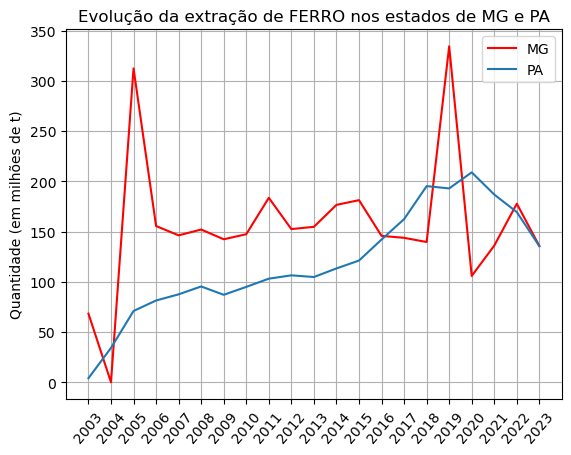

In [17]:
#Plotando o gráfico:
plt.plot(x_mg, y_mg, color='red', label = 'MG')
plt.plot(x_pa, y_pa, label = 'PA')

#Configurando o gráfico:
plt.title('Evolução da extração de FERRO nos estados de MG e PA')
plt.ylabel('Quantidade (em milhões de t)')
plt.xticks(np.arange(2003, 2024), rotation = 50)
plt.grid()
plt.legend()

%matplotlib inline

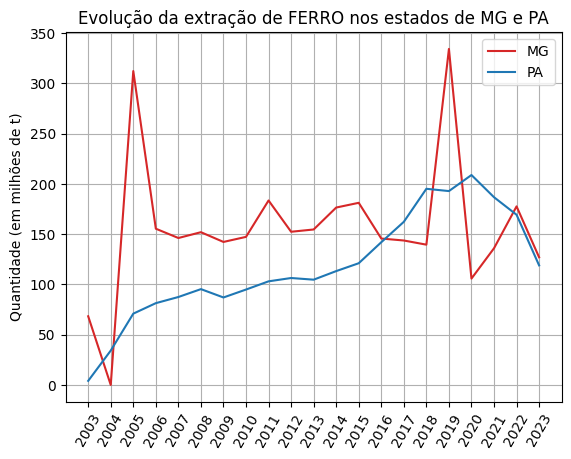

In [7]:
# NÃO EXECUTE ESTA CÉLULA PARA NÃO PERDER O GABARITO




Tarefa 5 - Percentual de arrecadação dos Estados da Região Sul e Minas Gerais no ano de 2022 por tipo de minério extraído - (2 pontos)
---------

Implemente funções para plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul ('PR', 'SC' e 'RS') no ano de 2022. Utilize o mesmo código para plotar o mesmo gráfico considerando apenas o Estado de Minas Gerais.

**Dica 1:** use os exemplos da documentação do matplotlib para fazer o gráfico: [Basic Pie Chart!](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

**Dica 2:** por questão de visualização, mostre apenas os  minérios mais frequentes e agrupe os menos frequentes em uma categoria "Outros". Seja criativo, as regras para agrupamento ficam a seu critério. =)


In [154]:
def porcentagem_sul():
    total_minerios = {}
    percento = {}
    total = 0
    outros = 0

    for dado in dados:
        uf = dado[7]
        minerio = dado[6]
        ano = int(dado[0])

        if ano == 2022:
            if uf == 'PR' or uf == 'SC' or uf == 'RS':
                total_minerios[minerio] = total_minerios.get(minerio, 0) + float(dado[11])/1000000
                total += float(dado[11])/1000000

    for minerio, valor in total_minerios.items():
        p = valor/total * 100
        if p > 2:
            percento[minerio] = round(p, 1)
        else:
            outros += p
            
    percento_sorted = sorted(percento.items(), key=itemgetter(1))
    percento_sorted.append(('OUTROS', round(outros, 1)))

    return percento_sorted

In [155]:
chama_porcentagem_sul = porcentagem_sul()

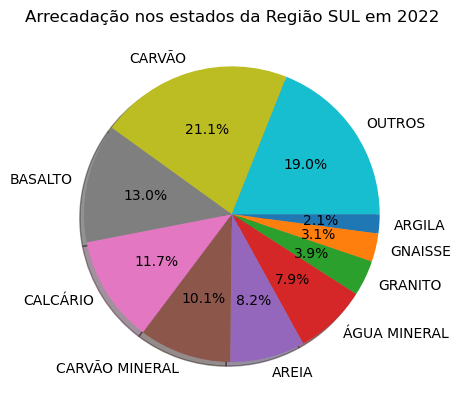

In [156]:
label = []
values = []

for l in range(len(chama_porcentagem_sul)):
    label.append(chama_porcentagem_sul[l][0])
    values.append(chama_porcentagem_sul[l][1])

#Plotando o gráfico:
plt.pie(values, labels=label, autopct="%1.1f%%", counterclock=False, shadow=True)
plt.title('Arrecadação nos estados da Região SUL em 2022')

%matplotlib inline

In [157]:
def porcentagem_mg():
    total_minerios = {}
    percento = {}
    total = 0
    outros = 0

    for dado in dados:
        uf = dado[7]
        minerio = dado[6]
        ano = int(dado[0])

        if ano == 2022:
            if uf == 'MG':
                total_minerios[minerio] = total_minerios.get(minerio, 0) + float(dado[11])/1000000
                total += float(dado[11])/1000000

    for minerio, valor in total_minerios.items():
        p = valor/total * 100
        if p > 40:
            percento[minerio] = round(p, 1)
        else:
            outros += p
            
    percento_sorted = sorted(percento.items(), key=itemgetter(1))
    percento_sorted.append(('OUTROS', round(outros, 1)))

    return percento_sorted

In [158]:
chama_porcentagem_mg = porcentagem_mg()

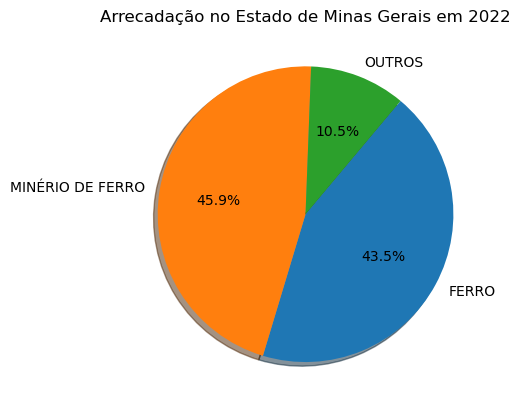

In [163]:
label = []
values = []

for l in range(len(chama_porcentagem_mg)):
    label.append(chama_porcentagem_mg[l][0])
    values.append(chama_porcentagem_mg[l][1])

#Plotando o gráfico:
plt.pie(values, labels=label, autopct="%1.1f%%", counterclock=False, shadow=True, startangle=50)
plt.title('Arrecadação no Estado de Minas Gerais em 2022')

%matplotlib inline

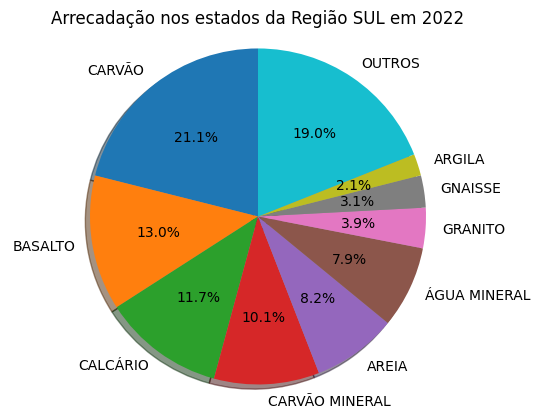

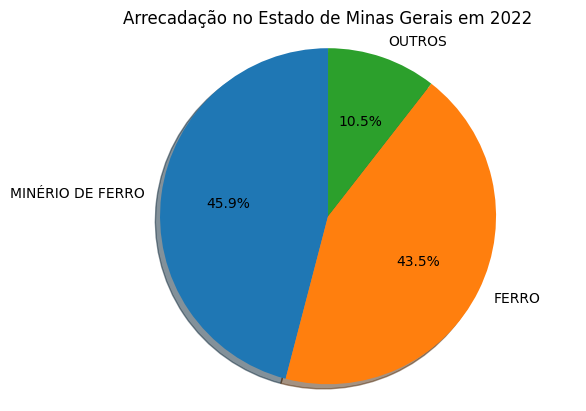

In [12]:
# NÃO EXECUTE ESTA CÉLULA PARA NÃO PERDER O GABARITO


